In [2]:
# imports
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix  , classification_report ,accuracy_score

#load data & display 
data = pd.read_csv('/home/khaldoun/Desktop/MBDS/Data-driven Business/3rd Assigment /application_train.csv')
data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# prepare target data 
y = data['TARGET']

In [4]:
#review data types in features

pd.DataFrame(data.dtypes).value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
#remove non-categorical data(note : we have examined floats and int columns to make sure they are continious data)

data = data.select_dtypes(exclude=['float64' , 'int64'])

data.shape

(307511, 16)

In [6]:
# review Null Values 

pd.DataFrame(data.isna().sum()).sort_values(by=0 , ascending=False)

,0
FONDKAPREMONT_MODE,210295
WALLSMATERIAL_MODE,156341
HOUSETYPE_MODE,154297
EMERGENCYSTATE_MODE,145755
OCCUPATION_TYPE,96391
NAME_TYPE_SUITE,1292
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0


In [7]:
# drop featues with alot of null Values

data = data.drop(['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE'], axis=1)

pd.DataFrame(data.isna().sum()).sort_values(by=0 , ascending=False)
data.shape
data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [8]:
# get dummay varaibles 

data = pd.get_dummies(data)
data.shape

(307511, 99)

In [9]:
pd.DataFrame(data)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
307508,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#split data into test and train data 

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [11]:
# check data balance
pd.DataFrame(y_train).value_counts()

TARGET
0         226178
1          19830
dtype: int64

In [12]:
# #perform understabling to balance the data
# rus = RandomUnderSampler()
# X_rus, y_rus= rus.fit_sample(X_train, y_train)
# X_rus_test, y_rus_test= rus.fit_sample(X_test, y_test)

In [13]:
#perform oversampling on test and train date. 

oversample = SMOTE()

X_rus, y_rus = oversample.fit_resample(X_train, y_train)

X_rus_test, y_rus_test = oversample.fit_resample(X_test, y_test)

In [14]:
#display new data counts
pd.DataFrame(y_rus).value_counts()

TARGET
1         226178
0         226178
dtype: int64

In [15]:
# initiate model

log_clf = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=500)

In [16]:
#fit model

log_clf.fit(X_rus, y_rus)

%time

CPU times: user 44 µs, sys: 20 µs, total: 64 µs
Wall time: 11 µs


/home/khaldoun/anaconda3/envs/khaldoun1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#print overall accuracy 
log_clf.score(X_rus_test , y_rus_test)

0.8402173143625681

In [18]:
# predict using model

y_pred = log_clf.predict(X_rus_test)


In [19]:
#generate classification model
print("Classification report for classifier %s:\n%s\n"
      % (log_clf, metrics.classification_report(y_rus_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_rus_test, y_pred))

Classification report for classifier LogisticRegression(max_iter=500):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     56508
           1       0.86      0.82      0.84     56508

    accuracy                           0.84    113016
   macro avg       0.84      0.84      0.84    113016
weighted avg       0.84      0.84      0.84    113016


Confusion matrix:
[[48847  7661]
 [10397 46111]]


<AxesSubplot:>

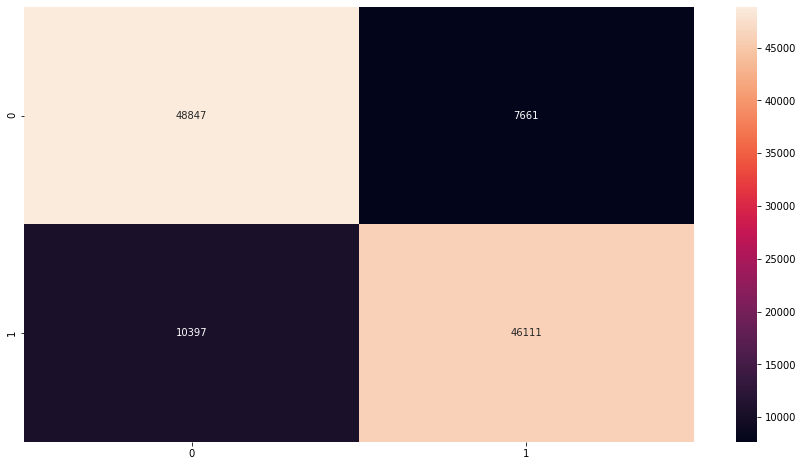

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_rus_test, y_pred) , annot=True , fmt='d') 

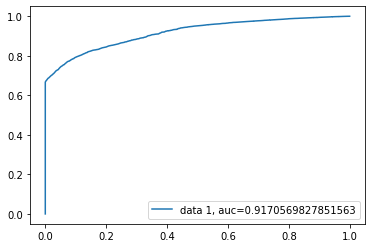

In [21]:
#AUC Curve
y_pred_proba = log_clf.predict_proba(X_rus_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_rus_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_rus_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

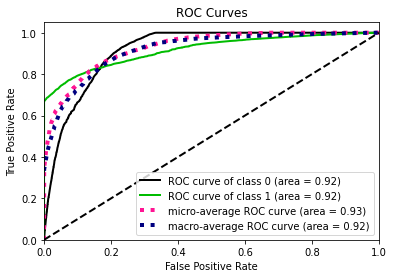

In [26]:
#ROC model 

skplt.metrics.plot_roc_curve(y_rus_test,y_pred_proba)
plt.show()